In [1]:
import pandas as pd

speech_df = pd.read_csv(r"../input/feml-dataset/inaugural_speeches.csv")

## 1. Introduction to Text Encoding
So far in this course you have dealt with data that, while sometimes messy, has been generally columnar in nature. When you are faced with text data this is often not going to be the case.
### 1.1. Theory
#### Standardizing your text
Data that is not in a predefined form is called unstructured data, and free text data is a good example of this. Before you can leverage text data in a machine learning model you must first transform it into a series of columns of numbers or vectors. 

There are many different approaches to doing this and in this chapter we will go through the most common approaches. In this chapter, you will be working with the United States inaugural address dataset, which contains the text for each `President's inaugural speech`. 

With `George Washington's` shown here.

In [2]:
speech_df.iloc[:2, [1, -1]]

,Inaugural Address,text
0,First Inaugural Address,Fellow-Citizens of the Senate and of the House...
1,Second Inaugural Address,Fellow Citizens: I AM again called upon by th...


It is clear that free text like this is not in tabular form.

#### Dataset
Before any text analytics can be performed, you must ensure that the text data is in a format that can be used. 

The speeches have been loaded as a pandas DataFrame called `speech_df`, with the body of the text in the `'text' column` as can be seen by looking at the top five rows using the `head() method` as shown.

In [3]:
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


#### Removing unwanted characters
Most bodies of text will have non letter characters such as punctuation, that will need to be removed before analysis. 

This can be achieved by using the `replace()` method along with the `str accessor`. We have used this in an earlier chapter, but instead of specifying the exact characters you wish to replace, this time you will use patterns called regular expressions. 

Now unless you go through the text of all speeches, it is difficult to determine which non-letter characters are present in the data. So the easiest way to deal with this to specify a pattern which replaces all non letter characters as shown here. 
- `[a-zA-Z].` The pattern *lowercase* `a` to *lowercase* `z` followed by *uppercase* `A` to *uppercase* `Z` inside square brackets basically indicates include **all letter characters**. 
- `[^a-zA-Z].` Placing a *caret* `^` before this pattern inside square brackets negates this, that is, says all non letter characters. 

In [4]:
doc = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


So we use the `replace() method` with this pattern to replace all non letter characters with a white-space as shown here.

Here you can see the text of the first speech before and after processing. Notice that the hyphen and the colon are missing.

In [5]:
print('Before:\t', speech_df.loc[0, 'text'][:100], '...')
print('After:\t', doc[0][:100], '...')

Before:	 Fellow-Citizens of the Senate and of the House of Representatives:  AMONG the vicissitudes incident  ...
After:	 Fellow Citizens of the Senate and of the House of Representatives   AMONG the vicissitudes incident  ...


#### Standardize the case
Once all unwanted characters have been removed you will want to standardize the remaining characters in your text so that they are all lower case. This will ensure that the same word with and without capitalization will not be counted as separate words. 

You can use the `lower()` method to achieve this as shown here.

In [6]:
sent = speech_df.loc[0, 'text'].lower()
print(sent[:100])

fellow-citizens of the senate and of the house of representatives:  among the vicissitudes incident 


#### Length of text
Later in this chapter you will work through the creation of features based on the content of different texts, but often there is value in the fundamental characteristics of a passage, such as its length. Using the `len()` method, you can calculate the number of characters in each speech.


In [7]:
len_sent = speech_df['text'].str.len()
print('length of the first sentence: ', len_sent[0])

length of the first sentence:  8616


#### Word counts
Along with the pure character length of the speech, you may want to know how many words are contained in it. The most straight forward way to do this is to split the speech based an any white-spaces, and then count how many words there are after the split. 
- First, you will need to split the text with with the split() method as shown here and then

In [8]:
word_sent = speech_df['text'].str.split()
print('The first 10 words of the first sentence : \n', word_sent[0][:10])

The first 10 words of the first sentence : 
 ['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives:']


- chain the `len()` method to count the total number of words in each speech.

In [9]:
print('Number of words in the first sentence :', len( word_sent[0] ) )

Number of words in the first sentence : 1427


#### Average length of word
Finally, one other stat you can calculate is the average word length. Since you already have the total number of characters and the word count, you can simply divide them to obtain the average word length.

In [10]:
df = speech_df[['text']].copy()
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['avg_word_len'] = df['char_count'] / df['word_count']
df.head()

,text,char_count,word_count,avg_word_len
0,Fellow-Citizens of the Senate and of the House...,8616,1427,6.037842
1,Fellow Citizens: I AM again called upon by th...,787,135,5.829630
2,"WHEN it was first perceived, in early times, t...",13871,2317,5.986621
3,Friends and Fellow-Citizens: CALLED upon to u...,10144,1717,5.907979
4,"PROCEEDING, fellow-citizens, to that qualifica...",12902,2157,5.981456


### 1.2. PRACTICES
#### Exercise 1.2.1. Cleaning up your text
Unstructured text data cannot be directly used in most analyses. Multiple steps need to be taken to go from a long free form string to a set of numeric columns in the right format that can be ingested by a machine learning model. The first step of this process is to standardize the data and eliminate any characters that could cause problems later on in your analytic pipeline.

In this chapter you will be working with a new dataset containing the inaugural speeches of the presidents of the United States loaded as `df`, with the speeches stored in the text column.
#### SOLUTION.

In [11]:
df = speech_df[['text']].copy()

# Replace all non letter characters with a whitespace
df['text_clean'] = df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
df['text_clean'] = df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


#### Exercise 1.2.2. High level text features
Once the text has been cleaned and standardized you can begin creating features from the data. 

The most fundamental information you can calculate about free form text is its size, such as its length and number of words. In this exercise (and the rest of this chapter), you will focus on the cleaned/transformed text column (`text_clean`) you created in the last exercise.
#### SOLUTION,

In [12]:
# Find the length of each text
df['char_cnt'] = df['text_clean'].str.len()

# Count the number of words in each text
df['word_cnt'] = df['text_clean'].str.split().str.len()

# Find the average length of word
df['avg_word_length'] = df['char_cnt'] / df['word_cnt']

# Print the first 5 rows of these columns
df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head()

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363


## 2. Word counts
### 2.1. Theory.
Once high level information has been recorded you can begin creating features based on the actual content of each text.
#### Text to columns
The most common approach to this is to create a column for each word and record the number of times each particular word appears in each text. This results in a set of columns equal in width to the number of unique words in the dataset, with counts filling each entry. Taking just one sentence we can see that "of" occurs 3 tines, "the" 2 times and the other words once.

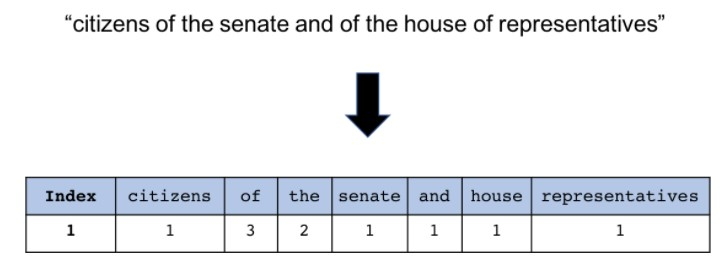

In [13]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Initializing the vectorizer
While you could of course write a script to do this counting yourself, scikit-learn already has this functionality built in with its CountVectorizer class.

As usual, 
- First `import CountVectorizer from sklearn.feature_extraction.text`, 
- Then instantiate it by assigning it to a variable name, `cv` in this case.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

#### Specifying the vectorizer
It may have become apparent that creating a column for every word will result in far too many values for analyses. Thankfully, you can specify arguments when initializing your `CountVectorizer` to limit this. 

- For example, you can specify the **minimum number of texts that a word must be contained in** using the argument `min_df`. If a float is given, the word must appear in at least this percent of documents. This threshold eliminates words that occur so rarely that they would not be useful when generalizing to new texts. 
- Conversely, `max_df` limits words to only ones that occur below a certain percentage of the data. This can be useful to remove words that occur too frequently to be of any value.

In [15]:
cv = CountVectorizer(min_df = 0.1, max_df = 0.9)

#### Fit the vectorizer
Once the vectorizer has been instantiated you can then fit it on the data you want to create your features around. 

This is done by calling the fit() method on relevant column.

In [16]:
cv.fit(df['text_clean'])

CountVectorizer(max_df=0.9, min_df=0.1)

#### Transforming your text
Once the vectorizer has been fit you can call the `transform() method` on the column you want to transform. This outputs a sparse array, with a row for every text and a column for every word that has been counted.

In [17]:
cv_transformed = cv.transform(df['text_clean'])
cv_transformed

<58x1930 sparse matrix of type '<class 'numpy.int64'>'
	with 27612 stored elements in Compressed Sparse Row format>

To transform this to a non sparse array you can use the `toarray() method`.

In [18]:
cv_transformed.toarray()

array([[ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  1,  1,  0],
       ...,
       [ 0,  0,  1, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 11,  0,  0]])

#### Getting the features
You may notice that the output is an array, with no concept of column names. To get the names of the features that have been generated you can call the `get_feature_names()` method on the vectorizer which returns a list of the features generated, in the same order that the columns of the converted array are in.

In [19]:
feature_names = cv.get_feature_names()
print(len(feature_names))
print(feature_names[:100])

1930
['abandon', 'abiding', 'ability', 'able', 'about', 'above', 'abroad', 'absolute', 'abuse', 'abuses', 'accept', 'accepted', 'accomplish', 'accomplished', 'accomplishment', 'accordance', 'according', 'account', 'accountability', 'achieve', 'achieved', 'achievement', 'achievements', 'acknowledge', 'acknowledged', 'acquiescence', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'acts', 'actual', 'adapted', 'add', 'added', 'additional', 'address', 'adequate', 'adjust', 'adjustment', 'administer', 'administered', 'administration', 'administrations', 'admitted', 'adopt', 'adopted', 'adoption', 'advance', 'advanced', 'advancement', 'advancing', 'advantage', 'advantages', 'affairs', 'affect', 'affecting', 'affection', 'afford', 'afforded', 'after', 'again', 'against', 'age', 'agencies', 'agents', 'ages', 'aggression', 'ago', 'agree', 'agricultural', 'agriculture', 'ahead', 'aid', 'aids', 'aim', 'alike', 'alliances', 'allies', 'allow', 'allowed', 'almighty', 'almost', 'alone', 'alon

#### Fitting and transforming
As an aside, while fitting and transforming separately can be useful, particularly when you need to transform a different data set than the one that you fit the vectorizer to, you can accomplish both steps at once using the `fit_transform()` method.

In [20]:
cv_fittrans = cv.fit_transform(df['text_clean'])
cv_fittrans

<58x1930 sparse matrix of type '<class 'numpy.int64'>'
	with 27612 stored elements in Compressed Sparse Row format>

#### Putting it all together
Now that you have an array containing the count values of each of the words of interest, and a way to get the feature names you can combine these in a DataFrame as shown here. 

The `add_prefix()` method allows you to be able to distinguish these columns in the future.

In [21]:
cv_df = pd.DataFrame(data = cv_fittrans.toarray(),
                    columns = feature_names).add_prefix('Counts_')
cv_df.head()

,Counts_abandon,Counts_abiding,Counts_ability,Counts_able,Counts_about,Counts_above,Counts_abroad,Counts_absolute,Counts_abuse,Counts_abuses,...,Counts_year,Counts_years,Counts_yes,Counts_yet,Counts_yield,Counts_you,Counts_young,Counts_your,Counts_zeal,Counts_zealously
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5,0,9,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,1,...,2,3,0,0,0,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,2,...,0,0,0,2,0,7,0,7,1,0
4,0,0,0,1,0,0,0,0,0,2,...,2,2,0,2,0,4,0,4,3,0


1 ```out Counts_aback Counts_abandon Counts_abandonment 0 1 0 0 1 0 0 1 2 0 1 0 3 0 1 0 4 0 0 0 ```
#### Updating your DataFrame
You can now combine this DataFrame with your original DataFrame so they can be used to generate future analytical models using pandas concat method. Checking the DataFrames shape shows the new much wider size. Remember to specify the axis argument to 1 as you want column bind these DataFrames.

In [22]:
expand_df = pd.concat([speech_df, cv_df], axis = 1, sort = False)
expand_df.shape

(58, 1934)

### 2.2. PRACTICES
#### Exercise 2.2.1. Counting words (Part. I)
Once high level information has been recorded you can begin creating features based on the actual content of each text. One way to do this is to approach it in a similar way to how you worked with categorical variables in the earlier lessons.

- For each unique word in the dataset a column is created.
- For each entry, the number of times this word occurs is counted and the count value is entered into the respective column.

These `"count"` columns can then be used to train machine learning models.

#### SOLUTION

In [23]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(df['text_clean'])

# Print the last 100 feature names
print(cv.get_feature_names()[-100:])

['withdrew', 'wither', 'withered', 'withheld', 'withhold', 'within', 'without', 'withstood', 'witness', 'witnessed', 'witnesses', 'wives', 'woe', 'woman', 'womanhood', 'women', 'won', 'wonder', 'wonderful', 'wonders', 'wonted', 'wood', 'woodsmen', 'word', 'words', 'work', 'worked', 'worker', 'workers', 'workforce', 'working', 'workingman', 'workingmen', 'workmanship', 'works', 'workshop', 'world', 'worldly', 'worlds', 'worldwide', 'worm', 'worn', 'worry', 'worse', 'worship', 'worst', 'worth', 'worthily', 'worthless', 'worthy', 'would', 'wouldn', 'wounded', 'wounds', 'wreckage', 'wrecked', 'wrest', 'wretchedness', 'wright', 'wringing', 'writ', 'write', 'writers', 'writing', 'written', 'wrong', 'wrongdoing', 'wronged', 'wrongfully', 'wrongs', 'wrote', 'wrought', 'year', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yesterdays', 'yet', 'yield', 'yielded', 'yielding', 'yields', 'york', 'yorktown', 'you', 'young', 'younger', 'youngest', 'your', 'yours', 'yourself', 'yourselves', 'youth

#### Exercise 2.2.2. Counting words (Part. II)
Once the vectorizer has been fit to the data, it can be used to transform the text to an array representing the word counts. This array will have a row per block of text and a column for each of the features generated by the vectorizer that you observed in the last exercise.

The vectorizer to you fit in the last exercise (cv) is available in your workspace.
#### SOLUTION

In [24]:
# Apply the vectorizer
cv_transformed = cv.transform(df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


#### Exercise 2.2.3. Limiting your features
As you have seen, using the `CountVectorizer` with its default settings creates a feature for every single word in your `corpus`. This can create far too many features, often including ones that will provide very little analytical value.

For this purpose `CountVectorizer` has parameters that you can set to reduce the number of features:

- `min_df` : Use only words that occur in more than this percentage of documents. This can be used to remove outlier words that will not generalize across texts.
- `max_df` : Use only words that occur in less than this percentage of documents. This is useful to eliminate very common words that occur in every corpus without adding value such as `"and"` or `"the"`.

#### SOLUTION.

In [25]:
# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


**Comments.** Notice that the number of features (unique words) greatly reduced from 9043 to 818?

#### Exercise 2.2.4. Text to DataFrame
Now that you have generated these count based features in an array you will need to reformat them so that they can be combined with the rest of the dataset. This can be achieved by converting the array into a pandas DataFrame, with the feature names you found earlier as the column names, and then concatenate it with the original DataFrame.

The numpy array (`cv_array`) and the vectorizer (`cv`) you fit in the last exercise are available in your workspace.
#### SOLUTION

In [26]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(data = cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([df, cv_df], axis=1, sort=False)
speech_df_new.head()

,text,text_clean,char_cnt,word_cnt,avg_word_length,Counts_abiding,Counts_ability,Counts_able,Counts_about,Counts_above,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0,0,0,0,0,...,0,0,0,0,0,1,0,5,0,9
1,Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,"WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0,0,0,0,0,...,0,0,0,0,2,3,0,0,0,1
3,Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0,0,0,1,1,...,0,0,1,2,0,0,2,7,0,7
4,"PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0,0,1,0,0,...,0,0,0,0,2,2,2,4,0,4


## 3. Term frequency-inverse document frequency
While counts of occurrences of words can be a good first step towards encoding your text to build models, it has some limitations. The main issue is counts will be much higher for very common even when they occur across all texts, providing little value as a distinguishing feature.

#### Introducing TF-IDF
Take for example the counts of the word `"you"` shown here, with plentiful occurrences in every row.

To limit these common words from overpowering your model some form of normalization can be used.

In [27]:
speech_df_new['Counts_you'].head()

0    5
1    0
2    0
3    7
4    4
Name: Counts_you, dtype: int64

One of the most effective approaches to do this is called `"Term Frequency Inverse Document Frequency"` or `TF-IDF`.

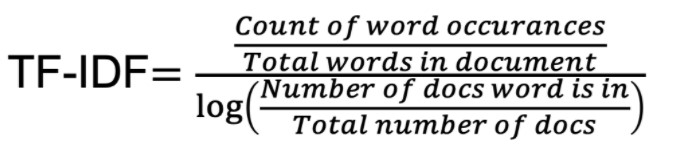

In [28]:
## Hình minh họa Image(fig1, height, width)

#### TF-IDF
TF-IDF divides number of times a word occurs in the document by a measure of what proportion of the documents a word occurs in all documents. This has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.

#### Importing the vectorizer
To use a TF-IDF vectorizer, the approach is very similar to how you applied a count vectorizer. First you must import TfidfVectorizer() from sklearn dot feature_extraction dot text, then you assign it to a variable name. Lets use tv in this case.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
tv

TfidfVectorizer()

#### Max features and stopwords
Similar to when you were working with the Count vectorizer where you could limit the number of features created by specifying arguments when initializing TfidfVectorizer, you can specify the maximum number of features using max_features which will only use the 100 most common words. 

We will also specify the vectorizer to omit a set of `stop_words`, these are a predefined list of the most common english words such as "and" or "the". 

You can use scikit-learn's built in list, load your own, or use lists provided by other python libraries.

In [30]:
tv = TfidfVectorizer(max_features = 100, stop_words = 'english')
tv

TfidfVectorizer(max_features=100, stop_words='english')

#### Fitting your text
Once the vectorizer has been specified you can fit it, and apply it to the text that you want to transform. 

Note that here we are fitting and transforming the train data, a subset of the original data.

In [31]:
tv_transformed = tv.fit_transform(df['text_clean'])

#### Putting it all together
As before, you combine the `TF-IDF` values along with the feature names in a DataFrame as shown here.

In [32]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features = 100, stop_words = 'english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
speed_tf_df = pd.concat([tv_df, df])
speed_tf_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years,text,text_clean,char_cnt,word_cnt,avg_word_length
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.060755,0.000000,0.045929,0.052694,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.024339,0.000000,0.000000,0.063643,0.073018,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.036610,0.000000,0.039277,0.095729,0.000000,NaN,NaN,NaN,NaN,NaN
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.094225,0.000000,0.000000,0.054752,0.062817,NaN,NaN,NaN,NaN,NaN


#### Inspecting your transforms
After transforming your data you should always check how the different words are being valued, and see which words are receiving the highest scores through the process. This will help you understand if the features being generated make sense or not. 

One ad hoc method is to isolate a single row of the transformed DataFrame (`tv_df` in this case), using the iloc accessor, and then sorting the values in the row in descending order as shown here. These top ranked values make sense for the text of a presidential speech.

In [33]:
examine_row = tv_df.iloc[0]
examine_row.sort_values(ascending = False)

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
                      ...   
TFIDF_political     0.000000
TFIDF_general       0.000000
TFIDF_freedom       0.000000
TFIDF_foreign       0.000000
TFIDF_action        0.000000
Name: 0, Length: 100, dtype: float64

#### Applying the vectorizer to new data
So how do you apply this transformation on the test set? As mentioned before, you should preprocess your test data using the transformations made on the train data only. To ensure that the same features are created you should use the same vectorizer that you fit on the training data. 

So 
- First, transform the test data using the tv vectorizer and 
- Then, recreate the test data set by combining the `TF-IDF values`, `feature names`, and other columns.

### 3.2. PRACTICES
#### Exercise 3.2.1. Tf-idf
While counts of occurrences of words can be useful to build models, words that occur many times may skew the results undesirably. To limit these common words from overpowering your model a form of normalization can be used. In this lesson you will be using `Term frequency-inverse document frequency (Tf-idf)` as was discussed in the theory. 

`Tf-idf` has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.
#### SOLUTION

In [34]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features = 100, stop_words = 'english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
tv_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


#### Exercise 3.2.2. Inspecting Tf-idf values
After creating `Tf-idf` features you will often want to understand what are the most highest scored words for each `corpus`. This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.

The DataFrame from the last exercise (`tv_df`) is available in your workspace.
#### SOLUTION,

In [35]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64


#### Exercise 3.2.3. Transforming unseen data
When creating vectors from text, any transformations that you perform before training a machine learning model, you also need to apply on the new unseen (test) data. To achieve this follow the same approach from the [last chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Feature%20Engineering%20for%20Machine%20Learning/Conforming%20to%20Statistical%20Assumptions.ipynb): fit the vectorizer only on the training data, and apply it to the test data.

In [36]:
train_speech_df = df.iloc[:45]
test_speech_df = df.iloc[45:]

For this exercise the `df` DataFrame has been split in two:

- `train_speech_df`: The training set consisting of the first 45 speeches.
- `test_speech_df`: The test set consisting of the remaining speeches.

#### SOLUTION

In [37]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed =  tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(data = test_tv_transformed.toarray(), 
                          columns = tv.get_feature_names()).add_prefix('TFIDF_')
test_tv_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_authority,TFIDF_best,TFIDF_business,TFIDF_citizens,TFIDF_commerce,TFIDF_common,...,TFIDF_subject,TFIDF_support,TFIDF_time,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.029540,0.233954,0.082703,0.000000,0.000000,0.000000,0.022577,0.0,0.000000,...,0.0,0.000000,0.115378,0.000000,0.024648,0.079050,0.033313,0.000000,0.299983,0.134749
1,0.000000,0.000000,0.547457,0.036862,0.000000,0.036036,0.000000,0.015094,0.0,0.000000,...,0.0,0.019296,0.092567,0.000000,0.000000,0.052851,0.066817,0.078999,0.277701,0.126126
2,0.000000,0.000000,0.126987,0.134669,0.000000,0.131652,0.000000,0.000000,0.0,0.046997,...,0.0,0.000000,0.075151,0.000000,0.080272,0.042907,0.054245,0.096203,0.225452,0.043884
3,0.037094,0.067428,0.267012,0.031463,0.039990,0.061516,0.050085,0.077301,0.0,0.000000,...,0.0,0.098819,0.210690,0.000000,0.056262,0.030073,0.038020,0.235998,0.237026,0.061516
4,0.000000,0.000000,0.221561,0.156644,0.028442,0.087505,0.000000,0.109959,0.0,0.023428,...,0.0,0.023428,0.187313,0.131913,0.040016,0.021389,0.081124,0.119894,0.299701,0.153133


## 4. N-Grams.
### 4.1. Theory.
#### Bag of words and N-grams
So far you have looked at individual words on their own without any context or word order, this approach is called a bag-of-words model, as the words are treated as if they are being drawn from a bag with no concept of order or grammar.

While analyzing the occurrences of individual words can be a valuable way to create features from a piece of text, you will notice that individual words can loose all their `context/meaning` when viewed independently.

#### Issues with bag of words
Take for example the word 'happy' shown here. One would assume it was used in a positive context, but if in reality it was used in the phrase `'not happy'` this assumption would be incorrect. 

Similarly, if the phrase was extended to `'never not happy'` the connotation changes again.

One common method to retain at least some concept of word order in a text is to instead use multiple consecutive words like:
- pairs (bi-gram) or 
- three consecutive words (tri-grams). 

This maintains at least some ordering information while at the same time allowing for the creation of a reasonable set of features.

#### Using N-grams
To leverage n-grams in your own models an additional argument `"ngram_range"`, can be specified when instantiating your `TF-IDF vectorizer`. 

The values assigned to the argument are the minimum and maximum length of `n-grams` to be included.

In [38]:
cv_bigram_vec = CountVectorizer(ngram_range = (2, 2))
print(cv_bigram_vec)
tv_bi_gram = cv_bigram_vec.fit_transform(df['text_clean'])
print(cv_bigram_vec.get_feature_names()[:10])

CountVectorizer(ngram_range=(2, 2))
['abandon all', 'abandon government', 'abandon mastery', 'abandon our', 'abandon their', 'abandon these', 'abandon they', 'abandon yet', 'abandoned and', 'abandoned by']


In this case you would only be looking at bi-grams (`n-grams with two words`)  or tri-grams (with 3 words)

In [39]:
cv_trigram_vec = CountVectorizer(ngram_range = (3, 2))
cv_trigram_vec

CountVectorizer(ngram_range=(3, 2))

#### Finding common words
As mentioned in the last section, when creating new features, you should always take time to check your work, and ensure that the features you are creating make sense. A good way to check your n-grams is to see what are the most common values being recorded.

This can be done by summing the values of your DataFrame of count values that you created using the `sum() method`.

In [40]:
tv_df = pd.DataFrame(data = tv_bi_gram.toarray(),
                    columns = cv_bigram_vec.get_feature_names()
                    ).add_prefix('counts_')
tv_df.sum()

counts_abandon all           2
counts_abandon government    1
counts_abandon mastery       1
counts_abandon our           1
counts_abandon their         1
                            ..
counts_zealously devote      1
counts_zealously devoted     1
counts_zealously to          1
counts_zealously unite       1
counts_zone and              1
Length: 63681, dtype: int64

After sorting the values in descending order you can see the most commonly occurring values. 

In [41]:
tv_df.sum().sort_values(ascending = False).head()

counts_of the     1719
counts_in the      797
counts_to the      698
counts_of our      605
counts_and the     460
dtype: int64

### 4.2. PRACTICES
#### Exercise 4.2.1. Using longer n-grams
So far you have created features based on individual words in each of the texts. This can be quite powerful when used in a machine learning model but you may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use n-grams which are sequence of n words grouped together. For example:

- bigrams: Sequences of two consecutive words
- trigrams: Sequences of two consecutive words

These can be automatically created in your dataset by specifying the ngram_range argument as a `tuple (n1, n2)` where all `n-grams` in the `n1` to `n2 range` are included.
#### SOLUTION

In [42]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (2, 3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['administration government', 'almighty god', 'american people', 'beloved country', 'best ability', 'best interests', 'blessings liberty', 'branch government', 'branches government', 'carry effect', 'chief justice', 'chief magistrate', 'children children', 'civil religious', 'civil service', 'civil war', 'common good', 'constitution laws', 'constitution united', 'constitution united states', 'declaration independence', 'defend constitution', 'discharge duties', 'executive department', 'federal government', 'fellow americans', 'fellow citizens', 'foreign affairs', 'foreign nations', 'form government', 'free government', 'free nations', 'free people', 'general government', 'god bless', 'good faith', 'good government', 'government people', 'government shall', 'government union', 'great nation', 'great people', 'half century', 'human dignity', 'human freedom', 'lasting peace', 'law abiding', 'let resolve', 'men women', 'mr chief', 'mr chief justice', 'national government', 'national life',

#### Exercise 4.2.2. Finding the most common words
Its always advisable once you have created your features to inspect them to ensure that they are as you would expect. This will allow you to catch errors early, and perhaps influence what further feature engineering you will need to do.

The vectorizer (`cv`) you fit in the last exercise and the sparse array consisting of word counts (`cv_trigram`) is available in your workspace.
#### SOLUTION

In [43]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(data = cv_trigram.toarray(), 
                        columns=cv_trigram_vec.get_feature_names()
                        ).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_united states         157
Counts_fellow citizens       111
Counts_american people        41
Counts_federal government     35
Counts_self government        30
dtype: int64


**Comments.** The most common trigram is constitution united states makes a lot of sense for US presidents speeches.